In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

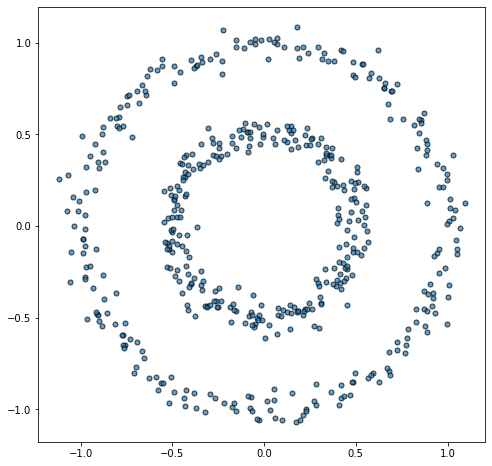

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

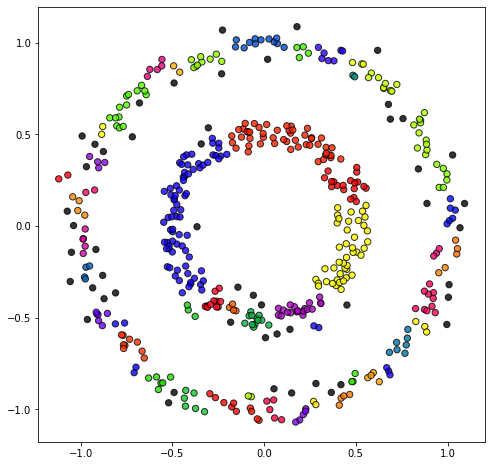

In [5]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [6]:
pogo.initial_idx_

2389

In [7]:
pogo.idx_

740

In [8]:
pogo.candidates_[:20]

[2389,
 1996,
 1717,
 794,
 1254,
 1297,
 1824,
 1933,
 2320,
 1335,
 1228,
 1188,
 511,
 760,
 1028,
 1172,
 1483,
 1628,
 1592,
 740]

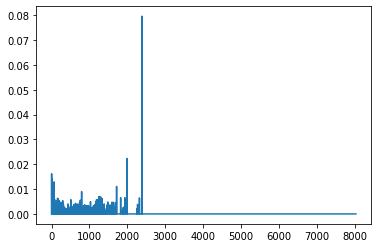

In [9]:
plt.plot(pogo.gap_vector_)

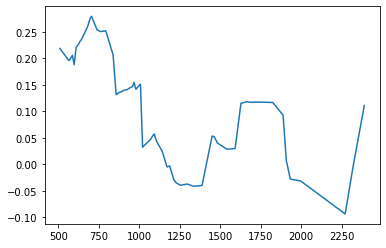

In [10]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


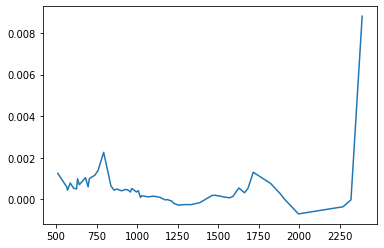

In [11]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [12]:
silhouette_indices[np.argmax(silhouette_gap)]

2389

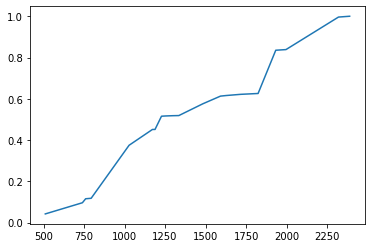

In [13]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [14]:
rand_indices[np.argmax(rand_array)]

2389

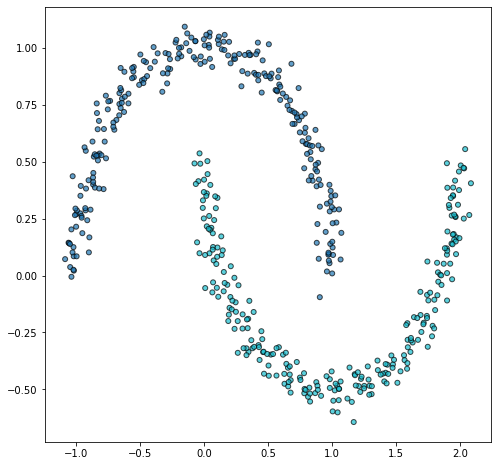

In [15]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

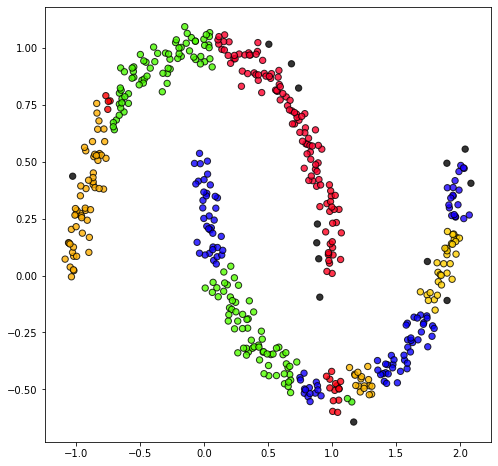

In [16]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [17]:
pogo.initial_idx_

3659

In [18]:
pogo.idx_

1270

In [19]:
pogo.candidates_[:10]

[3659, 2621, 2107, 1734, 1346, 1940, 1510, 2514, 1270, 1862]

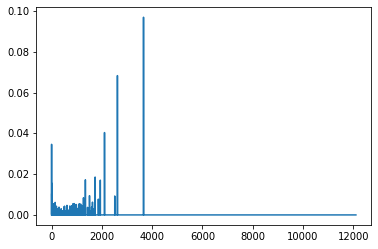

In [20]:
plt.plot(pogo.gap_vector_)

In [21]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)

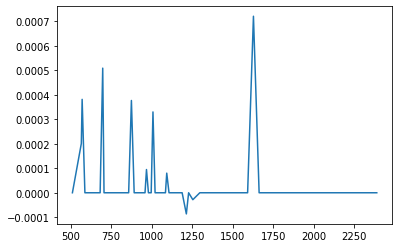

In [22]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [23]:
silhouette_indices[np.argmax(silhouette_gap)]

1628

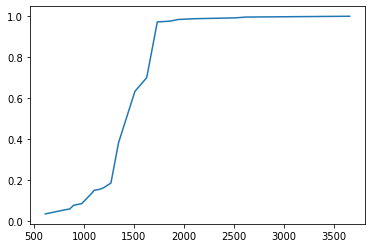

In [24]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [25]:
rand_indices[np.argmax(rand_array)]

3659

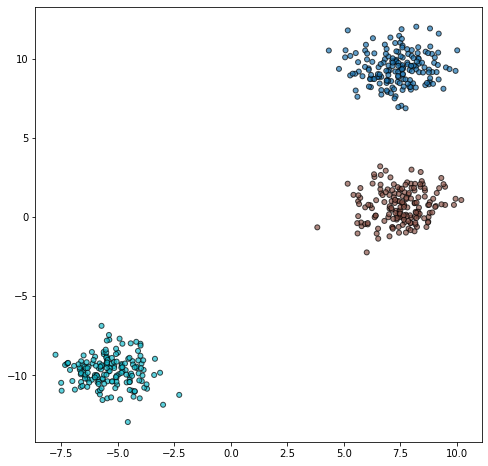

In [26]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

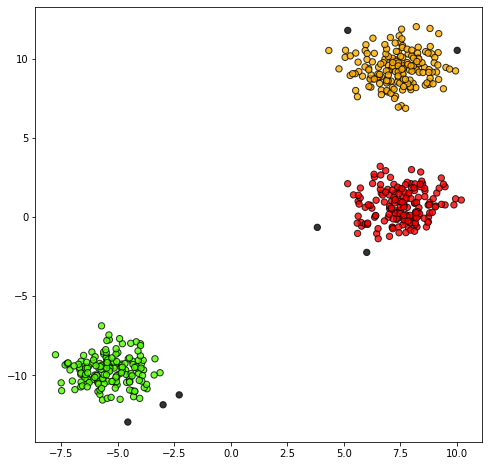

In [27]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [28]:
pogo.initial_idx_

22008

In [29]:
pogo.idx_

5322

In [30]:
pogo.candidates_[:20]

[22008,
 40162,
 16771,
 12286,
 5322,
 8881,
 6624,
 10585,
 4257,
 7996,
 3177,
 2924,
 2656,
 5107,
 4003,
 1805,
 3739,
 2105,
 2470,
 2355]

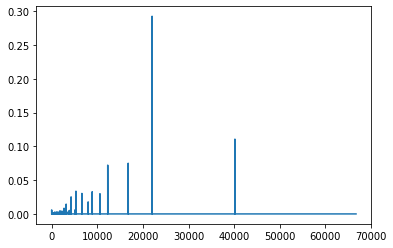

In [31]:
plt.plot(pogo.gap_vector_)

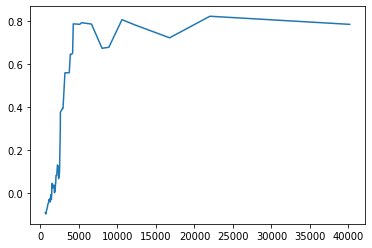

In [32]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

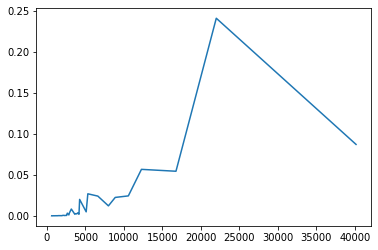

In [33]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [34]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

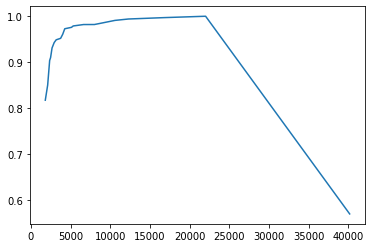

In [35]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [36]:
rand_indices[np.argmax(rand_array)]

22008

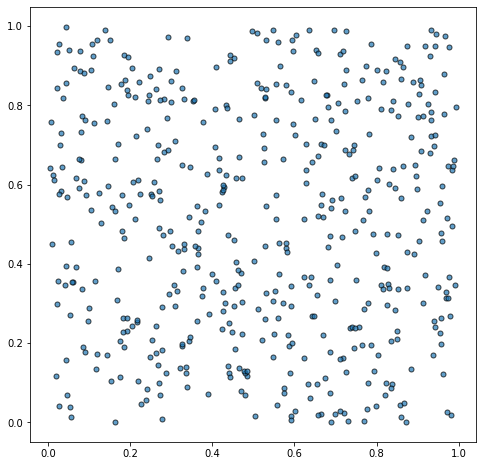

In [37]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

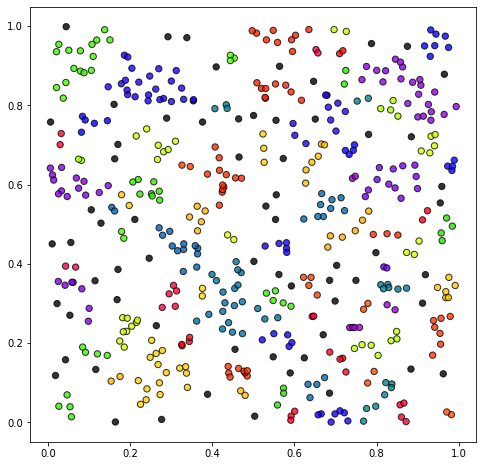

In [38]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [39]:
pogo.initial_idx_

575

In [40]:
pogo.idx_

504

In [41]:
pogo.candidates_[:20]

[575,
 1114,
 507,
 1636,
 660,
 1033,
 1226,
 523,
 708,
 678,
 518,
 918,
 648,
 598,
 560,
 1516,
 962,
 555,
 734,
 504]

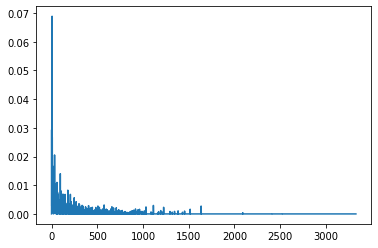

In [42]:
plt.plot(pogo.gap_vector_)

In [43]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


In [44]:
#silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
#plt.plot(silhouette_indices,silhouette_gap)

In [45]:
#silhouette_indices[np.argmax(silhouette_gap)]

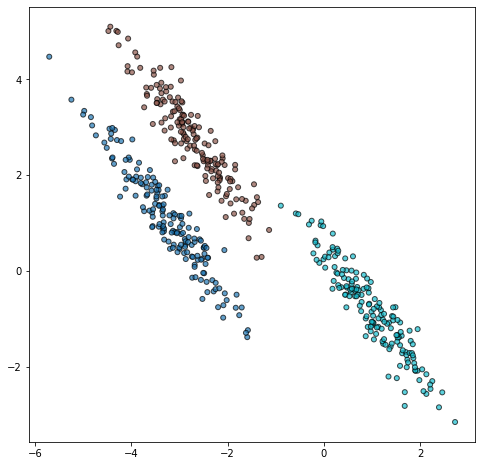

In [46]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

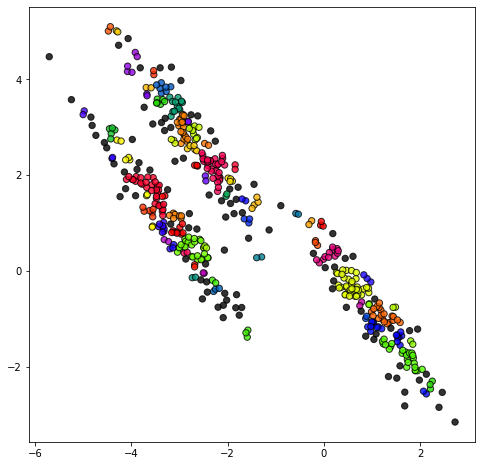

In [47]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [48]:
pogo.initial_idx_

4803

In [49]:
pogo.idx_

527

In [50]:
pogo.candidates_[:20]

[4803,
 1590,
 3035,
 8321,
 7101,
 2643,
 4003,
 2482,
 1877,
 3436,
 3770,
 4498,
 1241,
 6584,
 2133,
 2329,
 527,
 1510,
 2843,
 1060]

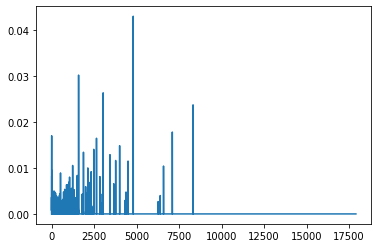

In [51]:
plt.plot(pogo.gap_vector_)

In [52]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [53]:
#silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
#plt.plot(silhouette_indices,silhouette_gap)

In [54]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

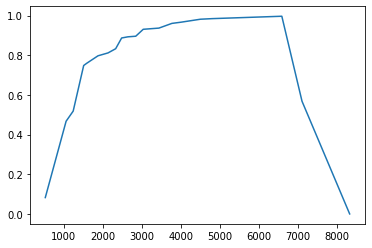

In [55]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [56]:
rand_indices[np.argmax(rand_array)]

6584

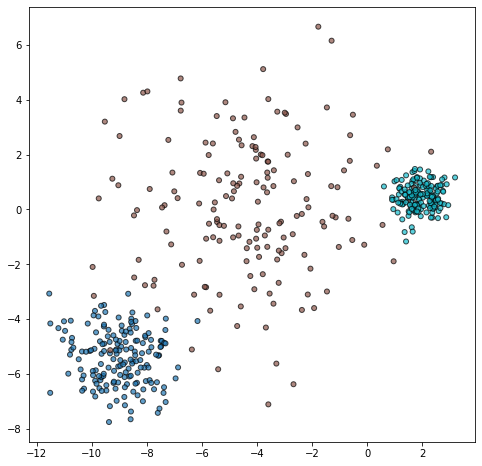

In [57]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

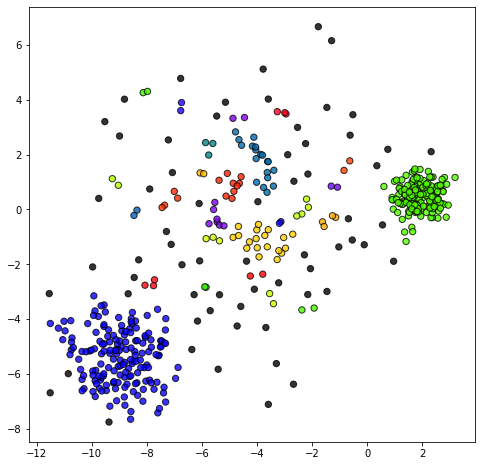

In [58]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [59]:
pogo.initial_idx_

12260

In [60]:
pogo.idx_

3485

In [61]:
pogo.candidates_[:20]

[12260,
 18297,
 4283,
 3849,
 5883,
 15860,
 2662,
 5369,
 8546,
 1340,
 6926,
 6221,
 2443,
 2544,
 3485,
 4560,
 10186,
 2213,
 571,
 9244]

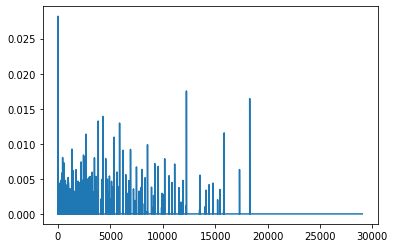

In [62]:
plt.plot(pogo.gap_vector_)

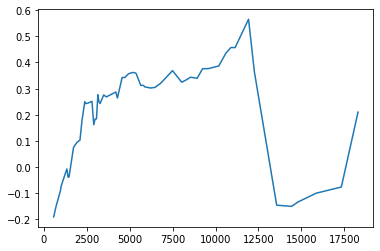

In [63]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


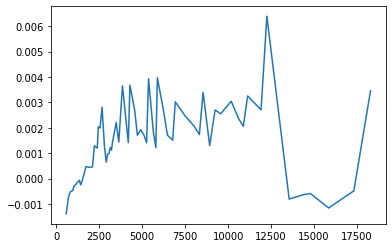

In [64]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [65]:
silhouette_indices[np.argmax(silhouette_gap)]

12260

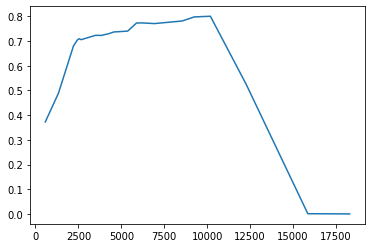

In [66]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [67]:
rand_indices[np.argmax(rand_array)]

10186

In [68]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

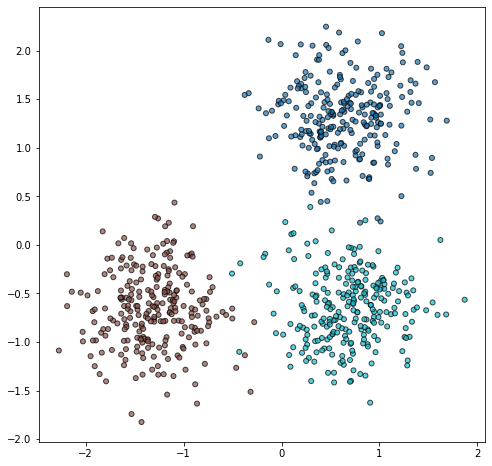

In [69]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

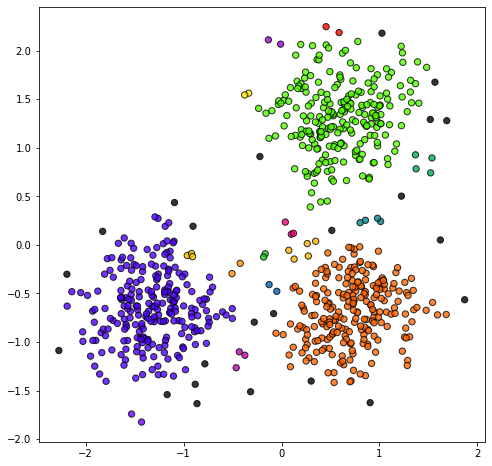

In [70]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [71]:
pogo.initial_idx_

3904

In [72]:
pogo.idx_

4182

In [73]:
pogo.candidates_[:20]

[3904,
 4182,
 7424,
 4817,
 5875,
 10681,
 9669,
 5532,
 2172,
 3004,
 5290,
 2569,
 3227,
 6928,
 3402,
 2659,
 1419,
 4609,
 2429,
 5136]

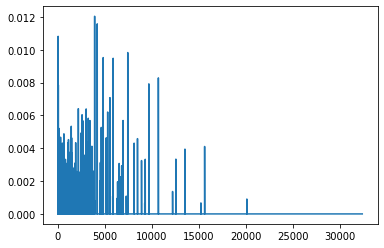

In [74]:
plt.plot(pogo.gap_vector_)

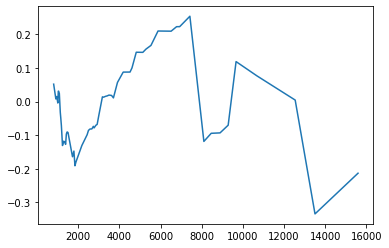

In [75]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [76]:
silhouette_indices[np.argmax(silhouette_array)]

7424

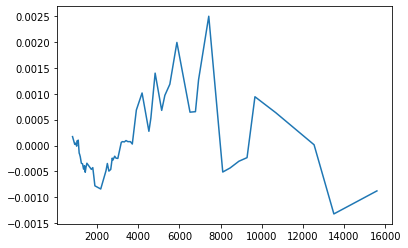

In [77]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [78]:
silhouette_indices[np.argmax(silhouette_gap)]

7424

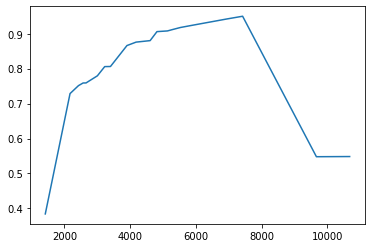

In [79]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [80]:
rand_indices[np.argmax(rand_array)]

7424

In [81]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [82]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [83]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


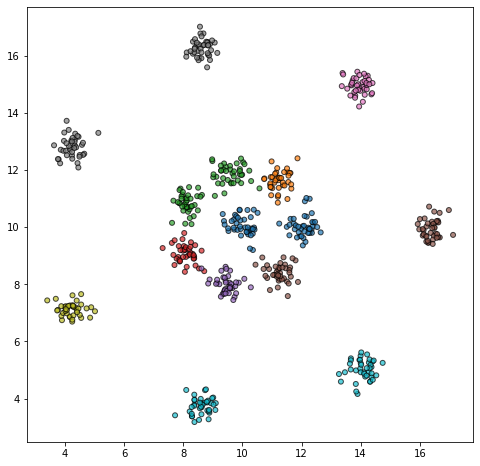

In [84]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

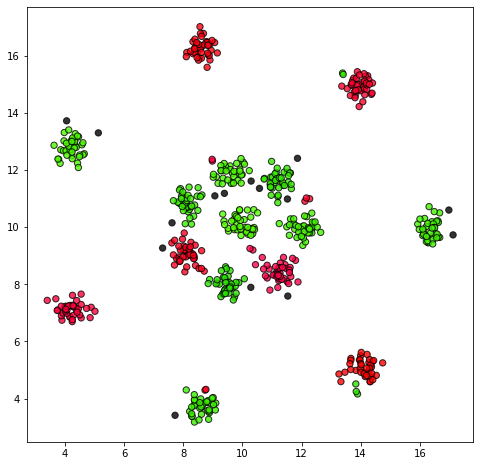

In [85]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [86]:
pogo.initial_idx_

7643

In [87]:
pogo.idx_

2781

In [88]:
pogo.candidates_[:20]

[7643,
 6053,
 3807,
 4346,
 7259,
 5481,
 6889,
 3187,
 5236,
 4962,
 5887,
 1903,
 3481,
 2781,
 3613,
 4837,
 2606,
 2452,
 2933,
 1171]

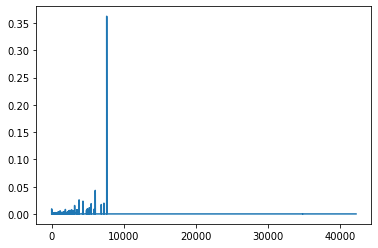

In [89]:
plt.plot(pogo.gap_vector_)

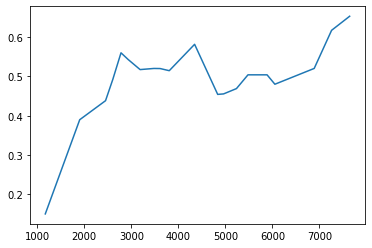

In [90]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


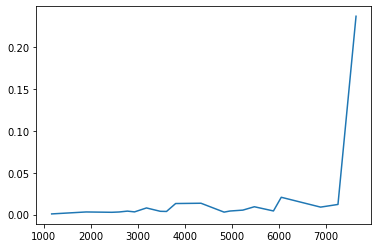

In [91]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [92]:
silhouette_indices[np.argmax(silhouette_gap)]

7643

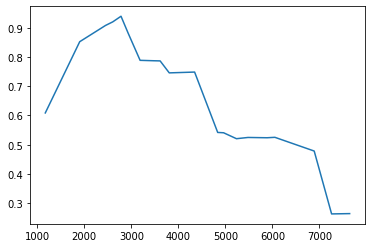

In [93]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [94]:
rand_indices[np.argmax(rand_array)]

2781

In [95]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


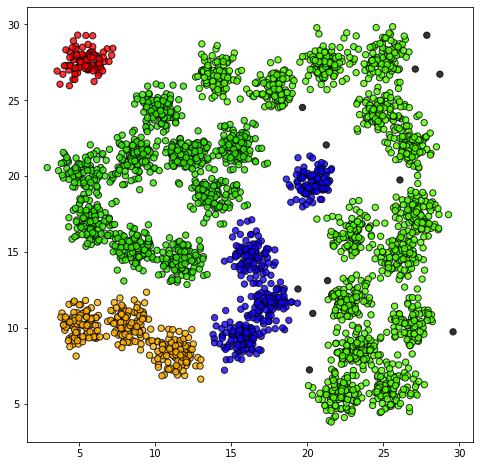

In [96]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [97]:
pogo.initial_idx_

75731

In [98]:
pogo.idx_

43716

In [99]:
pogo.candidates_[:20]

[75731,
 46769,
 59567,
 36168,
 69625,
 115780,
 28899,
 65829,
 30916,
 103999,
 33661,
 96637,
 43716,
 25467,
 40056,
 57702,
 23697,
 26203,
 39089,
 45146]

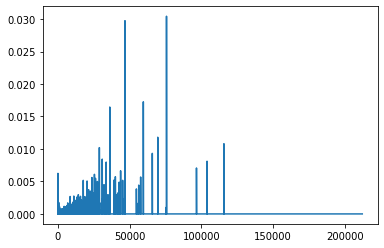

In [100]:
plt.plot(pogo.gap_vector_)

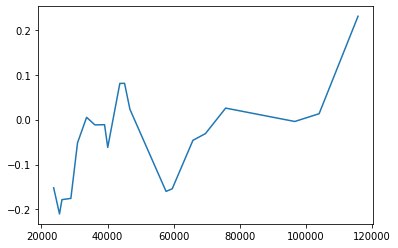

In [101]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


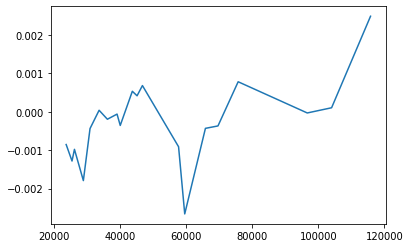

In [102]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

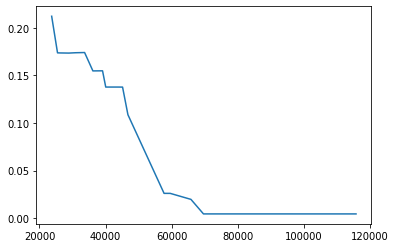

In [103]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [104]:
rand_indices[np.argmax(rand_array)]

23697